In [32]:
import os
import urllib.request

def download_unsplash_photo(photo_id, download_path):
    photo_path = os.path.join(download_path, photo_id + '.jpg') # f'unsplash-dataset/images/{photo_id}.jpg'

    if not os.path.exists(photo_path):
        download_url = f'https://unsplash.com/photos/{photo_id}/download?w=640'
        print(f'Downloading photo from {download_url}')
        urllib.request.urlretrieve(download_url, photo_path)

    return photo_path

In [48]:
def run_yolo(photo_path, result_project, result_name, yolo_path):
    params = [
        '--source', photo_path,
        '--project', result_project,
        '--name', result_name,
        '--exist-ok',
        '--save-txt',
    ]
    args = " ".join(params)

    !python $yolo_path $args > /dev/null 2> /dev/null

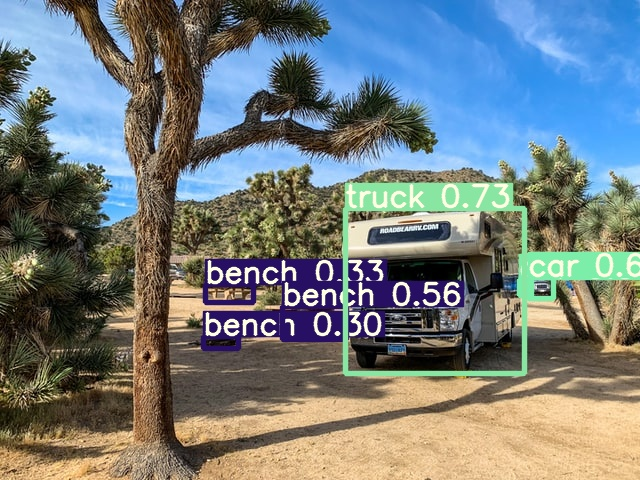

In [50]:
from IPython.display import Image

yolo_path = '/Users/vladimir/Projects/yolov5/detect.py'
download_path = 'unsplash-dataset/photos/'
result_project = 'unsplash-dataset'
result_name = 'yolo5'

photo_id = '9J4Id8uXcQU'

photo_path = download_unsplash_photo(photo_id, download_path)
run_yolo(photo_path, result_project, result_name, yolo_path)

Image(filename=f'unsplash-dataset/yolo5/{photo_id}.jpg')

In [65]:
import pandas as pd
import time
from multiprocessing import Pool

# Read the photos table
dataset_path = './unsplash-dataset/lite'
photos = pd.read_csv(os.path.join(dataset_path, "photos.tsv000"), sep='\t', header=0)

def process_photo(photo_id):
    start_time = time.time()
    photo_path = download_unsplash_photo(photo, download_path)
    run_yolo(photo_path, result_project, result_name, yolo_path)
    elapsed_time = time.time() - start_time
    print(f'Done in {elapsed_time:.1f}s')

pool = Pool(1)


photo_ids = list(photos['photo_id'])[:2]
display(photo_ids)

pool.map(process_photo, photo_ids)



# i = 1
# for photo in photos['photo_id']:
#     print(f'Processing photo {i}/{len(photos["photo_id"])}')

#     pool.map(process_photo, photo)
#     # process_photo(photo)

#     i = i+1
#     if i > 2:
#         break

['2Q8zDWkj0Yw', 'tsBDNuCJiLg']

KeyboardInterrupt: 